<a href="https://colab.research.google.com/github/rybak97/free_courses/blob/main/Introduction_to_Geospatial_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/tutorial/geospatial-data-python


In [2]:
 # Load all importance packages
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Getting to know GEOJSON file:
country = geopandas.read_file("/content/gz_2010_us_040_00_5m.json") # from https://eric.clst.org/tech/usgeojson
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


Each object can be used for a different type of physical object such as: Point for building, Line for Street, Polygon for city, and MultiPolygon for country with multiple cities inside.

<Axes: >

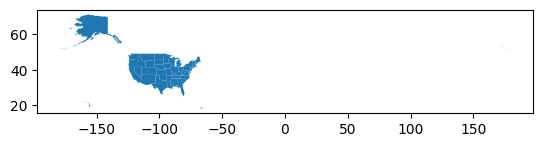

In [5]:
country.plot()

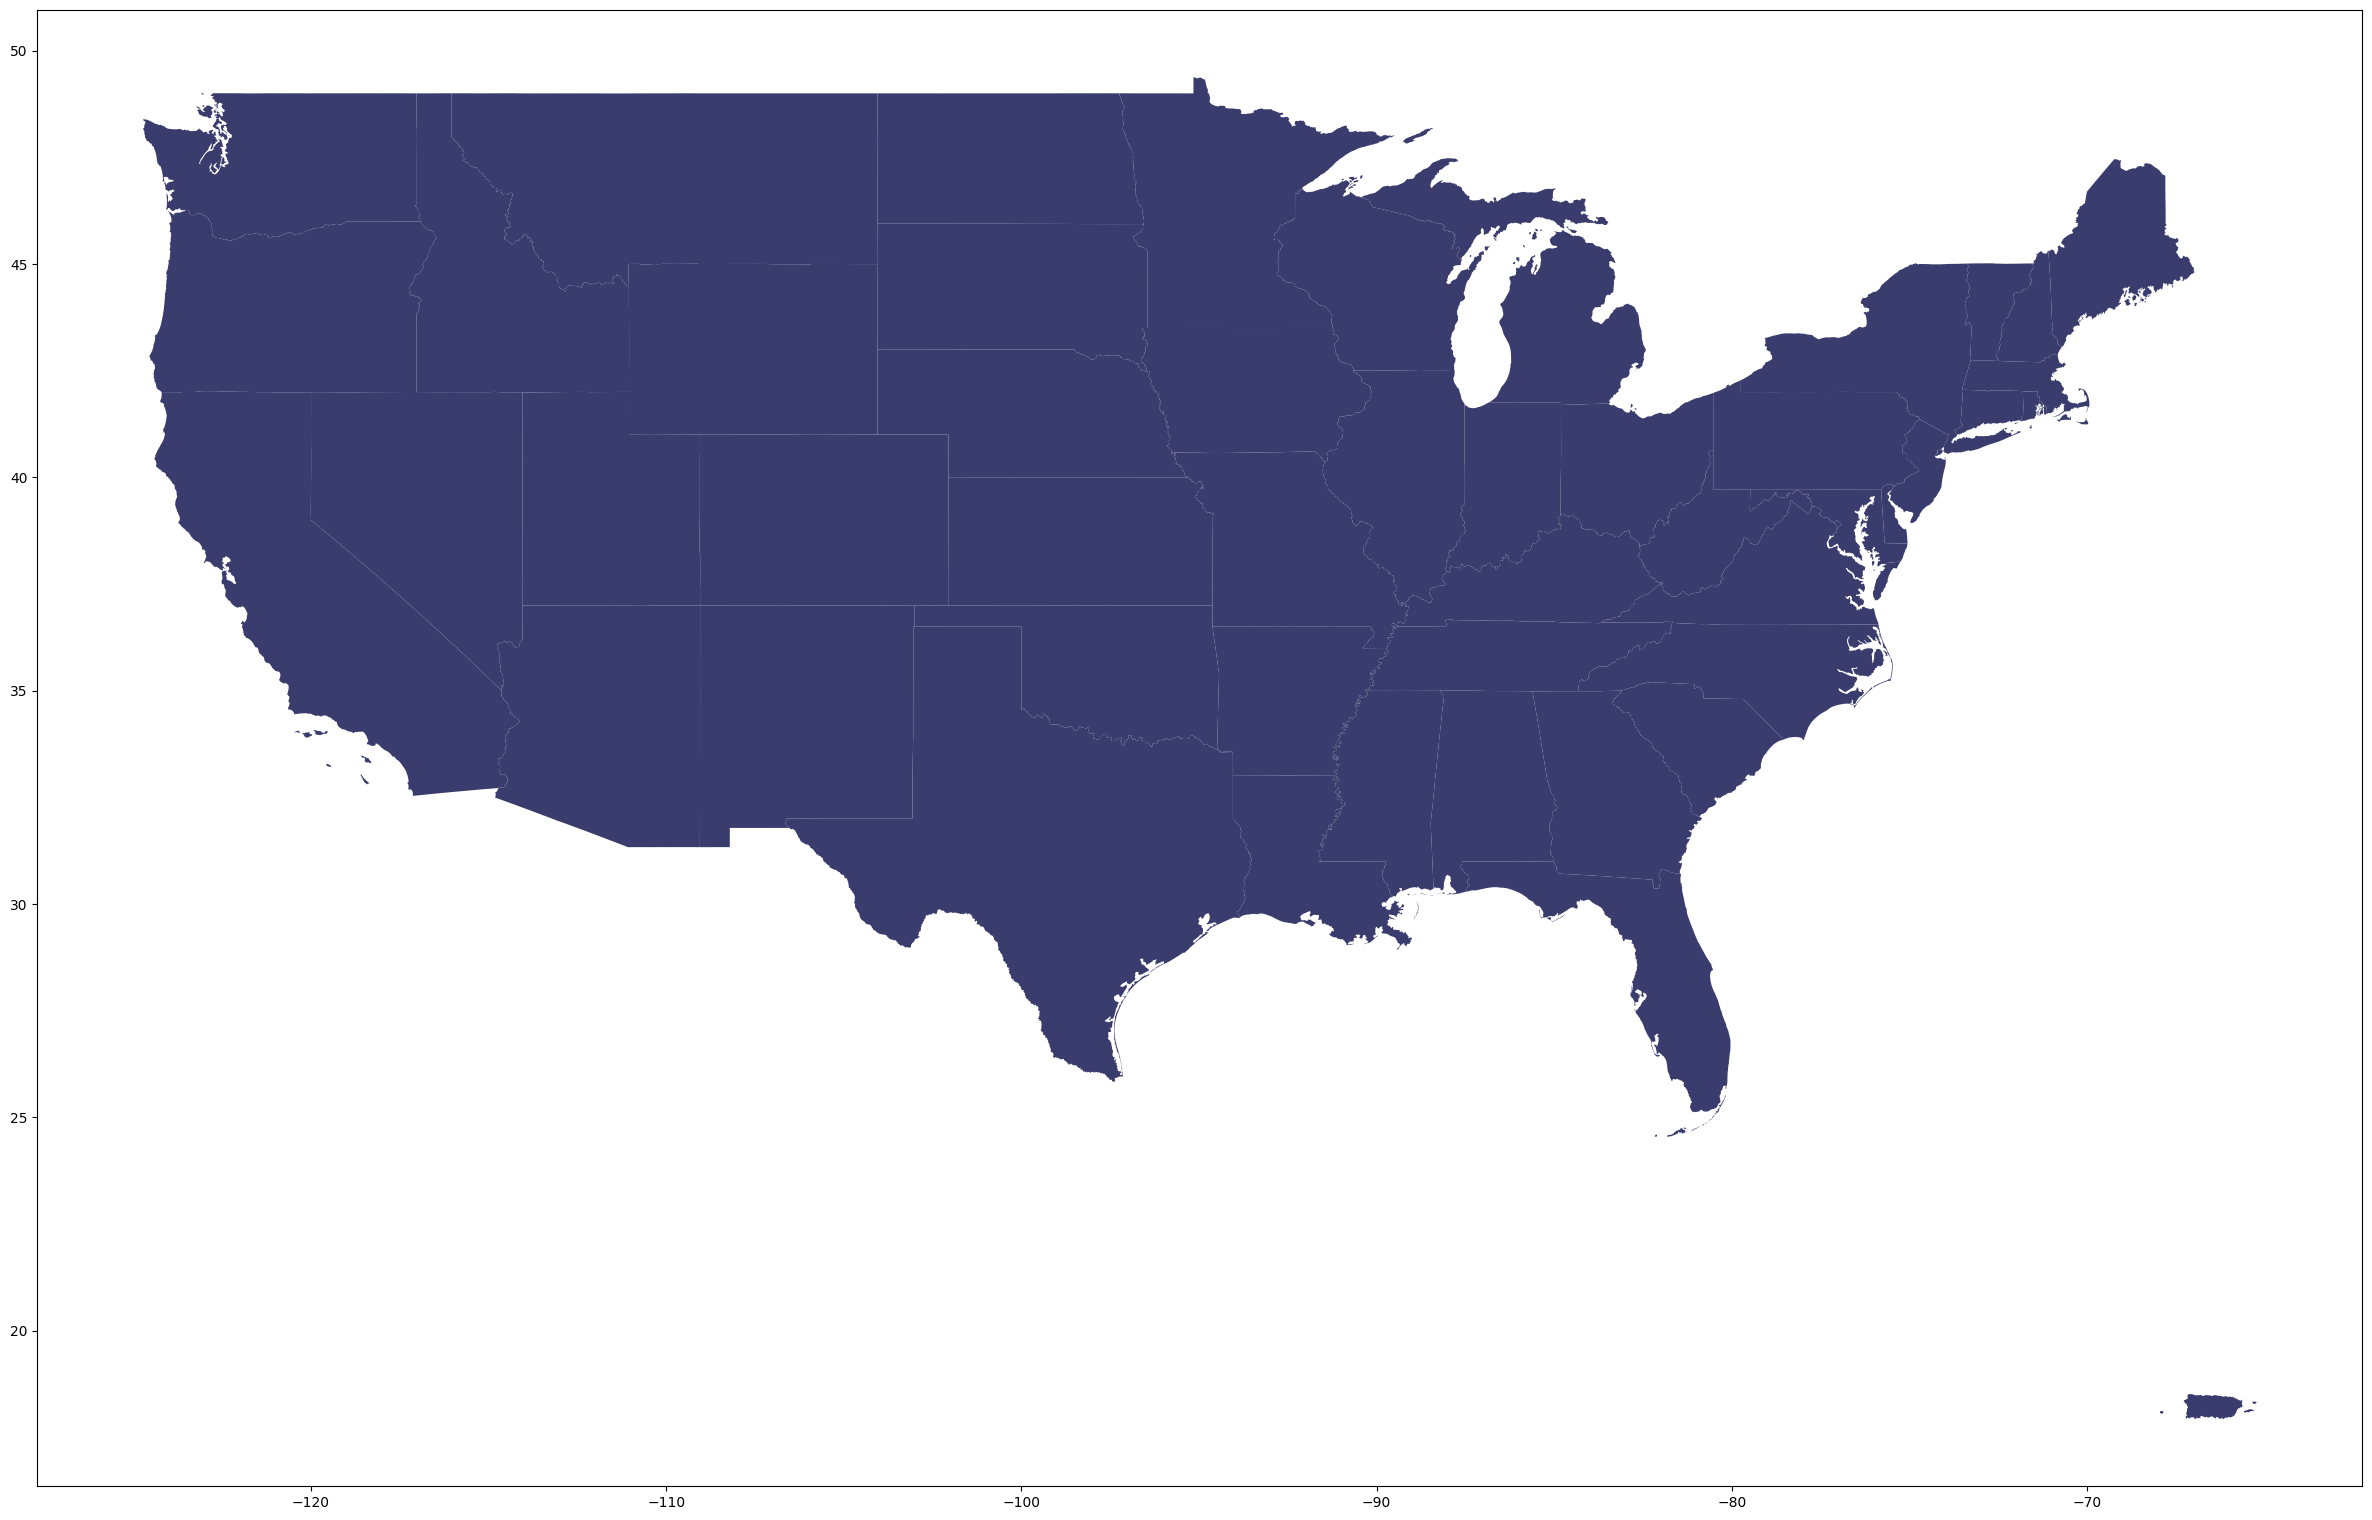

In [6]:
# Exclude Alaska and Hawaii for now
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#3B3C6E');

In [7]:
florence = pd.read_csv('/content/florence.csv')
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven


In [9]:
# dropping all unused features:
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


In [10]:
florence['Long'] = 0 - florence['Long'] # minus due to West movement

In [11]:
# Combining Lattitude and Longitude to create hurricane coordinates:
florence['coordinates'] = florence[['Long', 'Lat']].values.tolist()
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-18.4, 12.9]"
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.0, 12.9]"
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.4, 12.9]"
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.4, 13.1]"
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.9, 13.2]"


In [12]:
# Change the coordinates to a geoPoint
florence['coordinates'] = florence['coordinates'].apply(Point)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


In [13]:
# Convert the count df to geodf
florence = geopandas.GeoDataFrame(florence, geometry='coordinates')
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


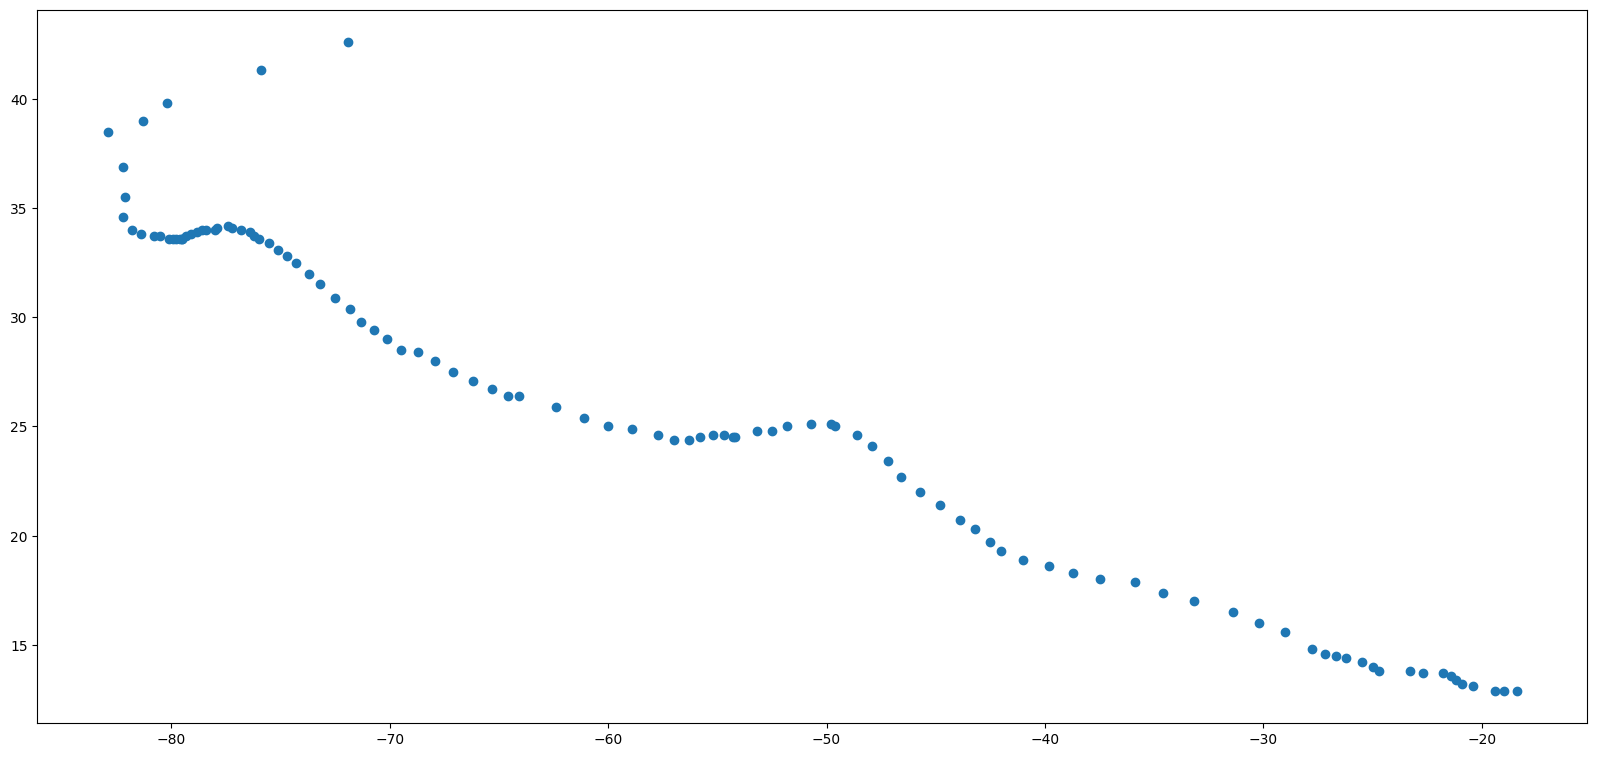

In [15]:
florence.plot(figsize=(20,10));

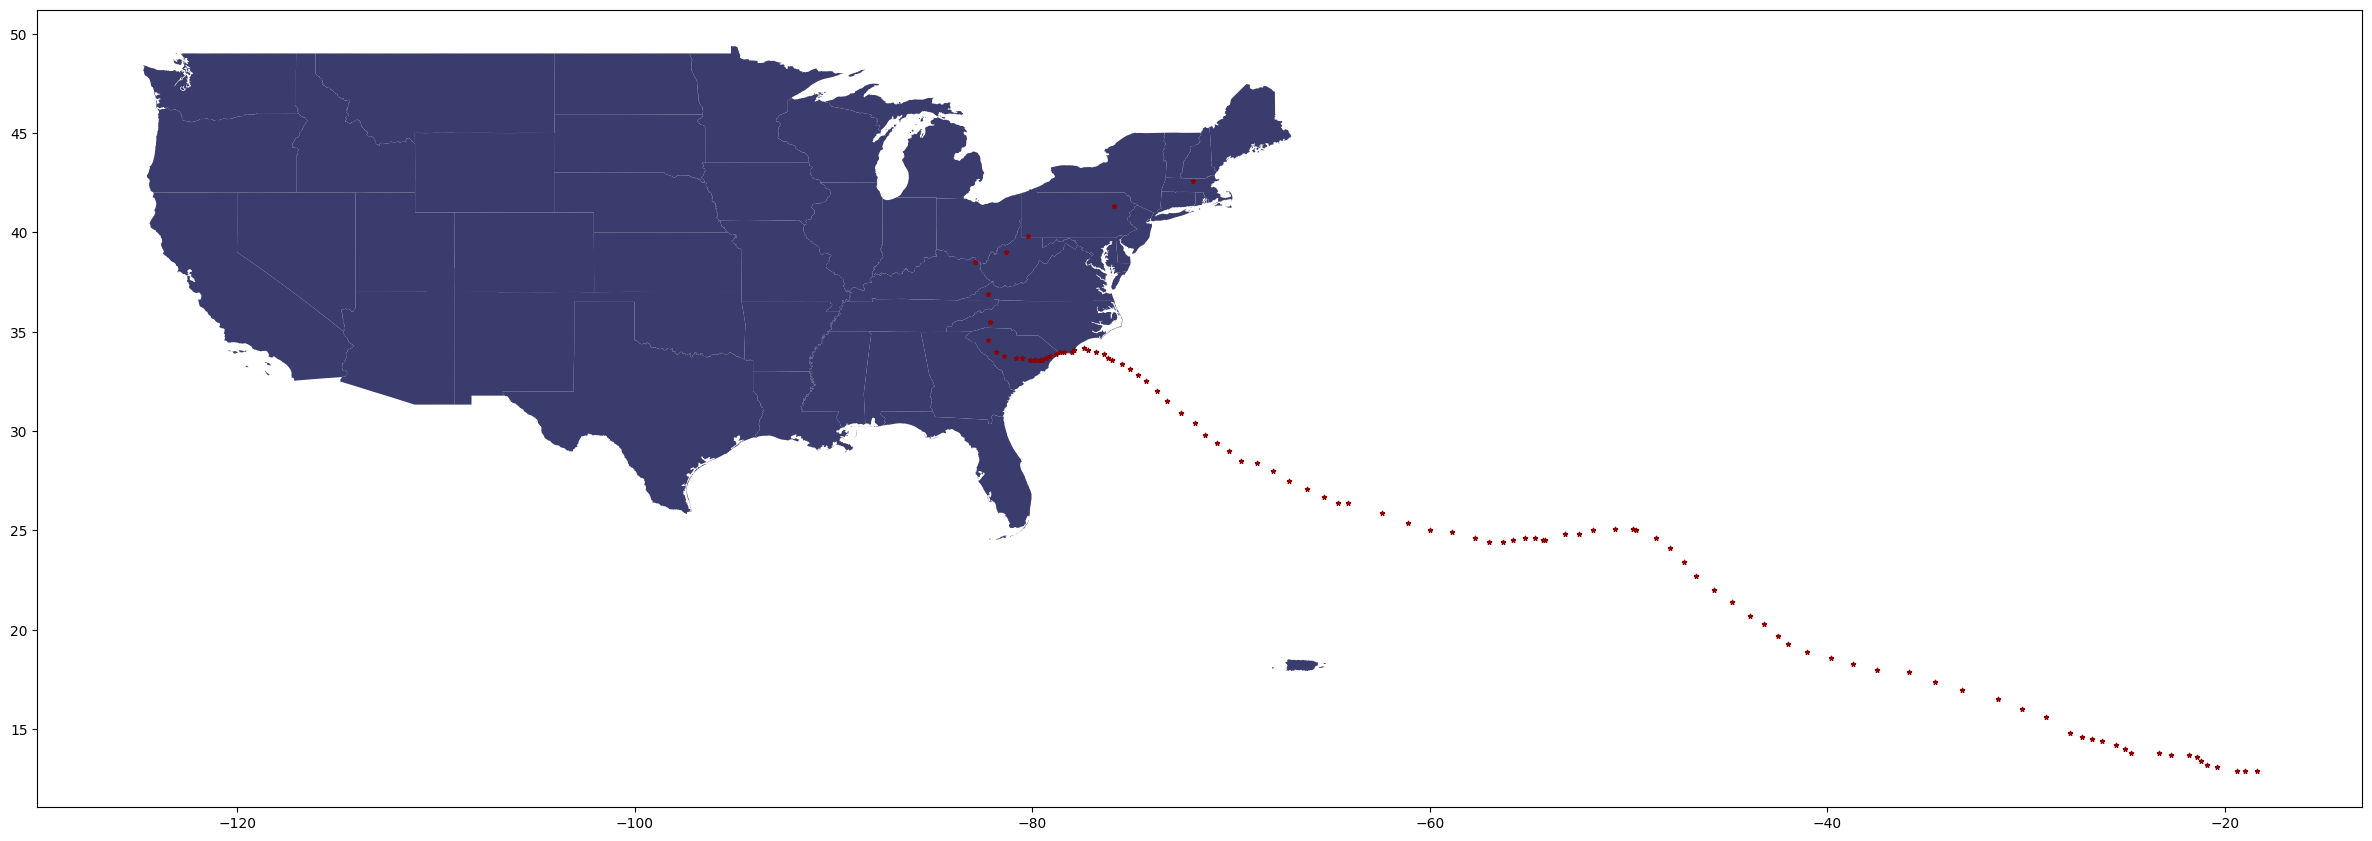

In [16]:
 # Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
florence.plot(ax=base, color='darkred', marker="*", markersize=10);

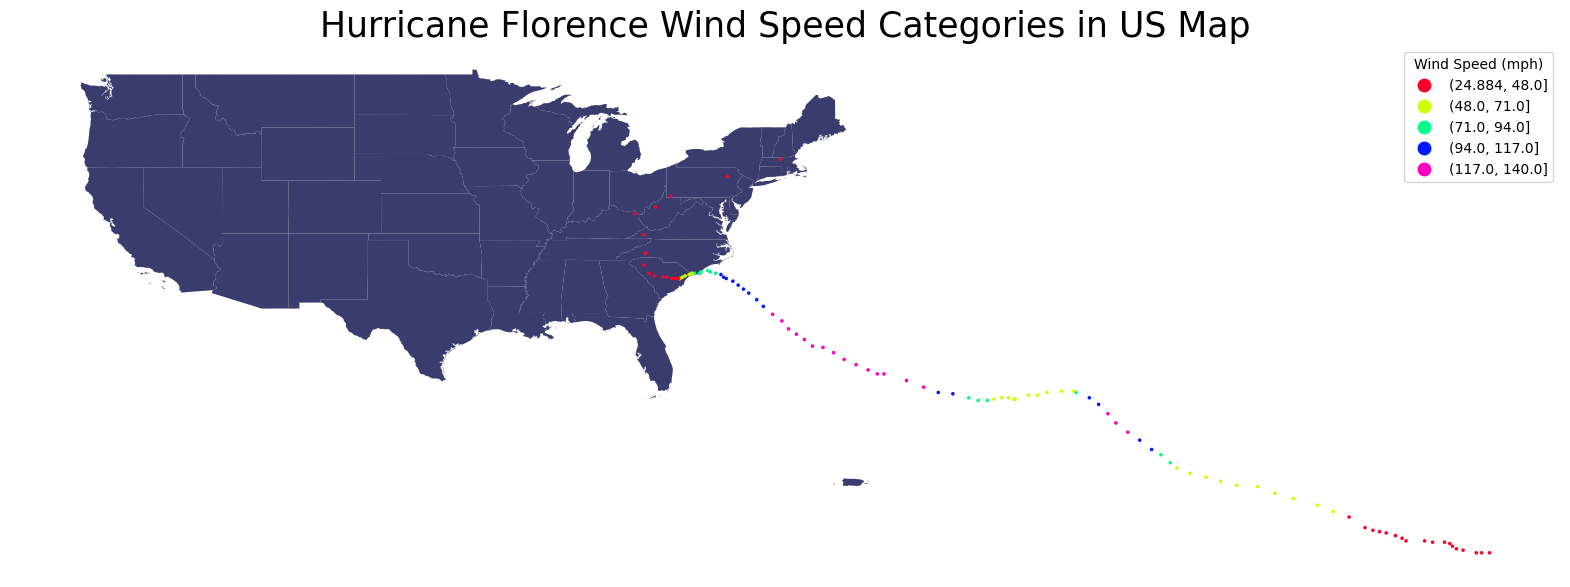

In [43]:
fig, ax = plt.subplots(1, figsize=(20,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

# Automatically categorize wind speeds into 5 groups
florence['wind_category_bins'] = pd.cut(florence['Wind'], bins=5, include_lowest=True)

# Plot the hurricane path, colored by the new wind speed categories
florence.plot(ax=base, column='wind_category_bins', marker=".", markersize=10, cmap='gist_rainbow', legend=True,
             legend_kwds={'title': 'Wind Speed (mph)', 'loc': 'upper right', 'markerscale': 1})

_ = ax.axis('off')
ax.set_title("Hurricane Florence Wind Speed Categories in US Map", fontsize=25)
plt.savefig('Hurricane_footage_categorized.png',bbox_inches='tight');